In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Atmospheric transmission between 100GHz and 200GHz at 1mm Precipitable Water Vapor (PWV) taken from [APEX Chajnantor Atmospheric Transmission
](http://www.apex-telescope.org/sites/chajnantor/atmosphere/transpwv/)

In [2]:
# reading 
frequency, transmission = np.loadtxt('data/water_vapor_transmission_100GHz_200GHz_1mm.dat').flatten('F').reshape(2, 1001)

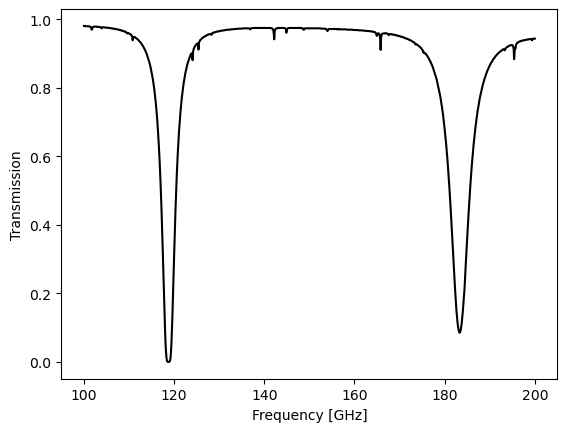

In [3]:
plt.plot(frequency, transmission, color='k')
plt.xlabel("Frequency [GHz]")
plt.ylabel('Transmission');

In [4]:
def evaluate_fit_quality(observed, predicted, num_parameters):
    """
    Evaluate the quality of a fit using the reduced chi-square and R^2 statistics.
    
    Parameters:
    - observed: Array of observed values.
    - predicted: Array of predicted values from the model.
    - num_parameters: The number of parameters in the model.
    
    Returns:
    - chi2_red: Reduced Chi-Square statistic.
    - r_squared: Coefficient of Determination (R^2).
    """
    residuals = observed - predicted
    N = len(observed)  # Number of data points
    
    # Use the standard deviation of the residuals as an estimate for uniform uncertainty
    sigma = np.std(residuals)
    
    # Reduced Chi-Square
    chi2_red = np.sum((residuals / sigma) ** 2) / (N - num_parameters)
    
    # Coefficient of Determination (R^2)
    ss_res = np.sum(residuals ** 2)
    ss_tot = np.sum((observed - np.mean(observed)) ** 2)
    r_squared = 1 - (ss_res / ss_tot)
    
    return chi2_red, r_squared


Absorption lines have Lorentzian profile

$$
\varphi(\nu, \nu_0) = \frac{\Gamma / (2\pi)}{(\nu - \nu_0)^2 + (\Gamma / 2)^2}
$$

- $\varphi(\nu, \nu_0)$ is the Lorentzian line shape function, describing the intensity of the absorption or emission line as a function of frequency $\nu$.
- $\nu$ is the frequency at which the line shape is evaluated.
- $\nu_0$ is the center frequency of the absorption or emission line.
- $\Gamma$ is the full width at half maximum (FWHM) of the line.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian_line_shape(nu, nu_0, Gamma):
    """
    Calculate the Lorentzian line shape function.
    
    Parameters:
    - nu: frequency (GHz)
    - nu_0: center frequency of the line (GHz)
    - Gamma: FWHM line width parameter (GHz)
    
    Returns:
    - The value of the Lorentzian line shape at frequency nu.
    """
    return - (Gamma / (2 * np.pi)) / ((nu - nu_0)**2 + (Gamma / 2)**2)

Fitting lorentzian profile for the atmospheric transmission data

In [6]:
# Example initial guesses
nu_0_guess = 119.0  # Guessing the dip's location
Gamma_guess = 2.0  

# Perform the curve fitting
popt, pcov = curve_fit(lorentzian_line_shape, frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], p0=[nu_0_guess, Gamma_guess])

# Extract the fitted parameters
fitted_nu_0, fitted_Gamma = popt

fitted_nu_0, fitted_Gamma

(118.71194815496125, 1.327856364134046)

In [7]:
fitted_curve = lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma)
chi2_red, r_squared = evaluate_fit_quality(transmission[(frequency > 115) & (frequency < 125)], fitted_curve, num_parameters=2)
print(f"Reduced Chi-Square: {chi2_red}")
print(f"Coefficient of Determination (R^2): {r_squared}")

Reduced Chi-Square: 10.875380222914629
Coefficient of Determination (R^2): -3.8134864373779056


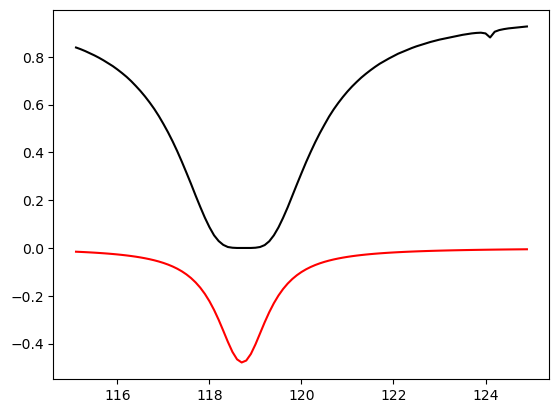

In [8]:
plt.plot(frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], color='k')
plt.plot(frequency[(frequency > 115) & (frequency < 125)], lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma), color='r')

With baseline

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian_line_shape(nu, nu_0, Gamma, baseline):
    """
    Calculate the Lorentzian line shape function.
    
    Parameters:
    - nu: frequency (GHz)
    - nu_0: center frequency of the line (GHz)
    - Gamma: FWHM line width parameter (GHz)
    
    Returns:
    - The value of the Lorentzian line shape at frequency nu.
    """
    return - (Gamma / (2 * np.pi)) / ((nu - nu_0)**2 + (Gamma / 2)**2) + baseline

In [10]:
# Example initial guesses
nu_0_guess = 119.0  # Guessing the dip's location
Gamma_guess = 2.0  
baseline_guess = 0.8

# Perform the curve fitting
popt, pcov = curve_fit(lorentzian_line_shape, frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], p0=[nu_0_guess, Gamma_guess, baseline_guess])

# Extract the fitted parameters
fitted_nu_0, fitted_Gamma, fitted_baseline = popt

fitted_nu_0, fitted_Gamma, fitted_baseline

(118.74518519201165, 1.0203440339953949, 0.6686786637259239)

In [11]:
fitted_curve = lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma, fitted_baseline)
chi2_red, r_squared = evaluate_fit_quality(transmission[(frequency > 115) & (frequency < 125)], fitted_curve, num_parameters=3)
print(f"Reduced Chi-Square: {chi2_red}")
print(f"Coefficient of Determination (R^2): {r_squared}")

Reduced Chi-Square: 1.0312499999999998
Coefficient of Determination (R^2): 0.5646007372675796


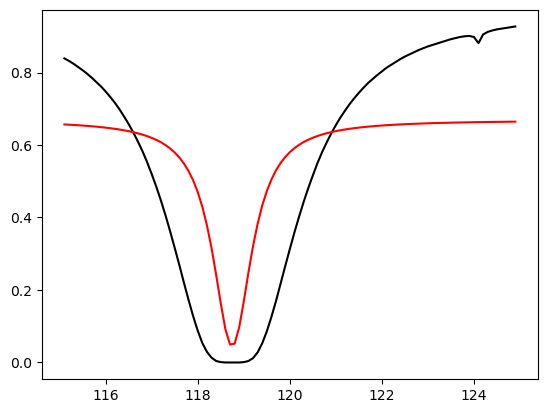

In [12]:
plt.plot(frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], color='k')
plt.plot(frequency[(frequency > 115) & (frequency < 125)], lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma, fitted_baseline), color='r')

With amplitude

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian_line_shape(nu, nu_0, Gamma, baseline, A):
    """
    Calculate the Lorentzian line shape function.
    
    Parameters:
    - nu: frequency (GHz)
    - nu_0: center frequency of the line (GHz)
    - Gamma: FWHM line width parameter (GHz)
    
    Returns:
    - The value of the Lorentzian line shape at frequency nu.
    """
    return - A * (Gamma / (2 * np.pi)) / ((nu - nu_0)**2 + (Gamma / 2)**2) + baseline

In [14]:
# Example initial guesses
nu_0_guess = 119.0  # Guessing the dip's location
Gamma_guess = 2.0  
baseline_guess = 0.8
A_guess = 1.0

# Perform the curve fitting
popt, pcov = curve_fit(lorentzian_line_shape, frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], p0=[nu_0_guess, Gamma_guess, baseline_guess, A_guess])

# Extract the fitted parameters
fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A = popt

fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A

(118.75485036776666,
 3.3260934442155716,
 1.0169047882265279,
 5.5964200458589515)

In [15]:
fitted_curve = lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A)
chi2_red, r_squared = evaluate_fit_quality(transmission[(frequency > 115) & (frequency < 125)], fitted_curve, num_parameters=4)
print(f"Reduced Chi-Square: {chi2_red}")
print(f"Coefficient of Determination (R^2): {r_squared}")

Reduced Chi-Square: 1.0421052631578946
Coefficient of Determination (R^2): 0.9958054404075228


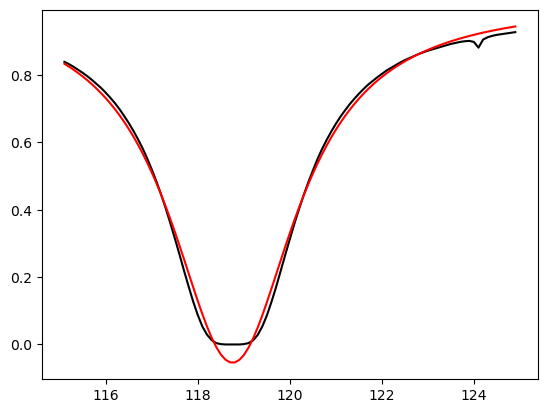

In [16]:
plt.plot(frequency[(frequency > 115) & (frequency < 125)], transmission[(frequency > 115) & (frequency < 125)], color='k')
plt.plot(frequency[(frequency > 115) & (frequency < 125)], lorentzian_line_shape(frequency[(frequency > 115) & (frequency < 125)], fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A), color='r')

For the second line

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def lorentzian_line_shape(nu, nu_0, Gamma, baseline, A):
    """
    Calculate the Lorentzian line shape function.
    
    Parameters:
    - nu: frequency (GHz)
    - nu_0: center frequency of the line (GHz)
    - Gamma: FWHM line width parameter (GHz)
    
    Returns:
    - The value of the Lorentzian line shape at frequency nu.
    """
    return - A * (Gamma / (2 * np.pi)) / ((nu - nu_0)**2 + (Gamma / 2)**2) + baseline

In [18]:
nu_0_guess = 185.0  
Gamma_guess = 2.0  
baseline_guess = 0.8
A_guess = 0.8

popt, pcov = curve_fit(lorentzian_line_shape, frequency[(frequency > 175) & (frequency < 200)], transmission[(frequency > 175) & (frequency < 200)], p0=[nu_0_guess, Gamma_guess, baseline_guess, A_guess])

fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A = popt

fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A

(183.35729483198637, 4.671158863870243, 0.9646246016852617, 6.5386282072788635)

In [19]:
fitted_curve = lorentzian_line_shape(frequency[(frequency > 175) & (frequency < 200)], fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A)
chi2_red, r_squared = evaluate_fit_quality(transmission[(frequency > 175) & (frequency < 200)], fitted_curve, num_parameters=4)
print(f"Reduced Chi-Square: {chi2_red}")
print(f"Coefficient of Determination (R^2): {r_squared}")

Reduced Chi-Square: 1.0163265306122449
Coefficient of Determination (R^2): 0.9989842879440242


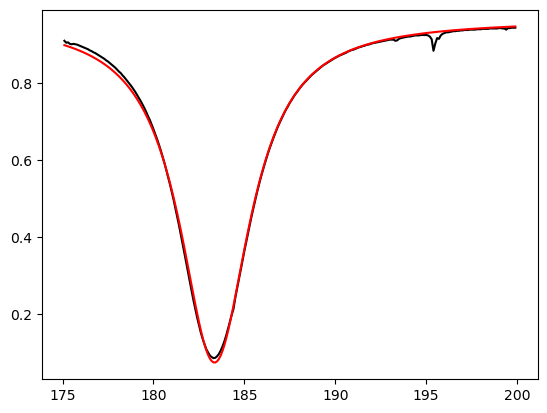

In [20]:
plt.plot(frequency[(frequency > 175) & (frequency < 200)], transmission[(frequency > 175) & (frequency < 200)], color='k')
plt.plot(frequency[(frequency > 175) & (frequency < 200)], lorentzian_line_shape(frequency[(frequency > 175) & (frequency < 200)], fitted_nu_0, fitted_Gamma, fitted_baseline, fitted_A), color='r');